In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_excel('/Users/hanhnguyen/Desktop/Workspace/44688/project.xlsx')


In [ ]:
#understanding the data

In [5]:
data.head()

,Patient_Number,Age,Sex,Chest_Location,Tot_Crackles_Sound,Tot_Wheezes_Sound,Diagnosis
0,101,3.0,F,"Al, Pr,",0,0,URTI
1,102,0.0,F,"Ar,",0,0,Healthy
2,103,70.0,F,"Ar,",0,4,Asthma
3,104,70.0,F,"Ll, Pr, Ar, Al, Lr, Pl,",1,1,COPD
4,105,7.0,F,"Tc,",0,0,URTI


In [6]:
data.tail()

,Patient_Number,Age,Sex,Chest_Location,Tot_Crackles_Sound,Tot_Wheezes_Sound,Diagnosis
121,222,60.0,M,"Pr, Ar, Lr,",13,21,COPD
122,223,NaN,NaN,"Ll, Pr, Ar, Al, Lr, Pl,",19,22,COPD
123,224,10.0,F,"Al, Tc,",0,0,Healthy
124,225,0.0,M,"Pl,",0,0,Healthy
125,226,4.0,M,"Ll, Al, Pl,",13,13,Pneumonia


In [7]:
data.shape

(126, 7)

In [8]:
data.describe()

,Patient_Number,Age,Tot_Crackles_Sound,Tot_Wheezes_Sound
count,126.000000,125.000000,126.000000,126.000000
mean,163.500000,42.952000,18.809524,20.269841
std,36.517119,32.263246,43.436890,44.159604
min,101.000000,0.000000,0.000000,0.000000
25%,132.250000,4.000000,0.000000,0.000000
50%,163.500000,60.000000,3.000000,5.000000
75%,194.750000,71.000000,15.000000,17.750000
max,226.000000,93.000000,367.000000,372.000000


In [9]:
data.columns

Index(['Patient_Number', 'Age', 'Sex', 'Chest_Location', 'Tot_Crackles_Sound',
       'Tot_Wheezes_Sound', 'Diagnosis'],
      dtype='object')

In [10]:
data.nunique()

Patient_Number        126
Age                    46
Sex                     2
Chest_Location         39
Tot_Crackles_Sound     41
Tot_Wheezes_Sound      44
Diagnosis               8
dtype: int64

In [11]:
data['Diagnosis'].unique()

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [ ]:
#cleaning the data

In [33]:
data.isnull().sum()

Patient_Number        0
Age                   1
Sex                   1
Chest_Location        0
Tot_Crackles_Sound    0
Tot_Wheezes_Sound     0
Diagnosis             0
dtype: int64

In [44]:
df= data.drop(['Chest_Location','Tot_Crackles_Sound','Tot_Wheezes_Sound','Patient_Number'], axis = 1)

In [45]:
df.head()

,Age,Sex,Diagnosis
0,3.0,F,URTI
1,0.0,F,Healthy
2,70.0,F,Asthma
3,70.0,F,COPD
4,7.0,F,URTI


In [70]:
df.describe()

,Age,Sex,Diagnosis
count,125.000000,126.000000,126.000000
mean,42.952000,0.738095,3.944444
std,32.263246,0.964809,1.310301
min,0.000000,0.000000,0.000000
25%,4.000000,0.000000,4.000000
50%,60.000000,0.000000,4.000000
75%,71.000000,2.000000,5.000000
max,93.000000,2.000000,7.000000


In [46]:
#relationship analysis

In [50]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
print(df.head())

    Age  Sex  Diagnosis
0   3.0    2          3
1   0.0    2          5
2  70.0    2          1
3  70.0    2          4
4   7.0    2          3


In [57]:
df.tail()

,Age,Sex,Diagnosis
121,60.0,0,4
122,NaN,1,4
123,10.0,2,5
124,0.0,0,5
125,4.0,0,0


In [51]:
corelation = df.corr()

<AxesSubplot:>

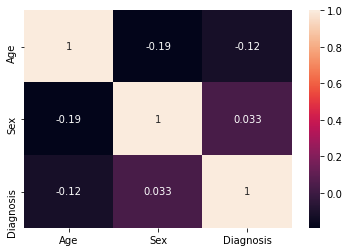

In [52]:
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns, annot = True)

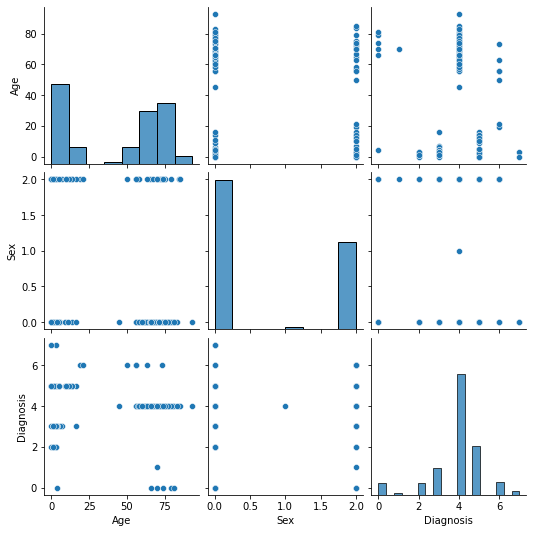

In [54]:
sns.pairplot(df)

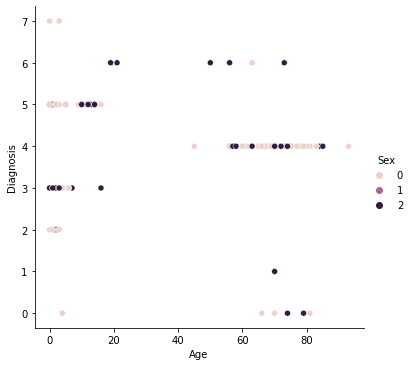

In [56]:
sns.relplot(x='Age',y="Diagnosis", hue='Sex', data = df)

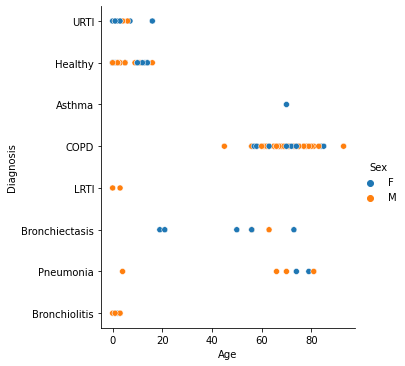

In [67]:
sns.relplot(x='Age',y="Diagnosis", hue='Sex', data = data)

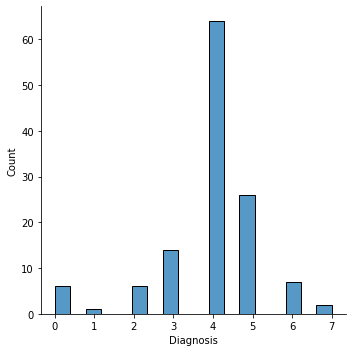

In [62]:
sns.displot(df['Diagnosis'])

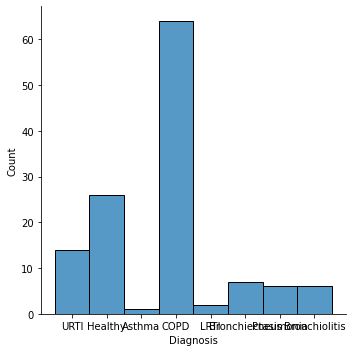

In [68]:
sns.displot(data['Diagnosis'])

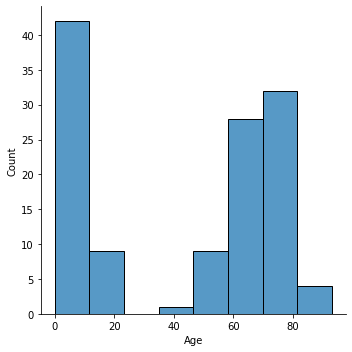

In [63]:
sns.displot(df['Age'])

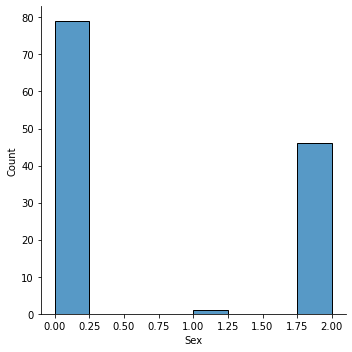

In [64]:
sns.displot(df['Sex'])

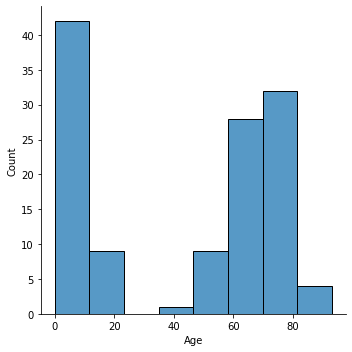

In [69]:
sns.displot(df['Age'])

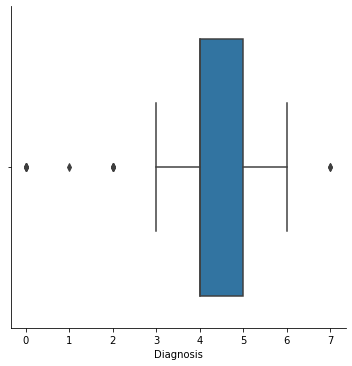

In [65]:
sns.catplot(x='Diagnosis',kind ='box', data = df)

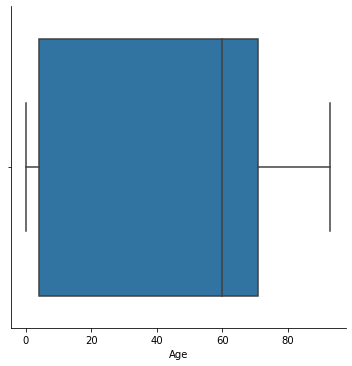

In [66]:
sns.catplot(x='Age',kind ='box', data = df)